In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import io


In [115]:
# dataset loading
df=pd.read_csv('LinearRegression/Breast_cancer_dataset.csv')
df.head()
df.isnull().sum()
df.describe()
df.drop(['Unnamed: 32','id'], axis=1, inplace=True)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


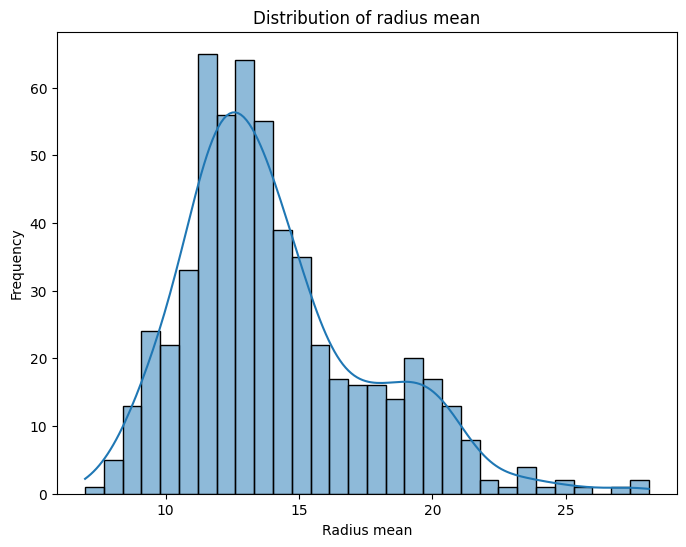

In [89]:
# Visualizing target variable distribution (in this we are assuming radius_mean as target)
plt.figure(figsize=(8,6))
sns.histplot(df['radius_mean'],kde=True,bins=30)
plt.title("Distribution of radius mean")
plt.xlabel('Radius mean')
plt.ylabel('Frequency')
plt.show()


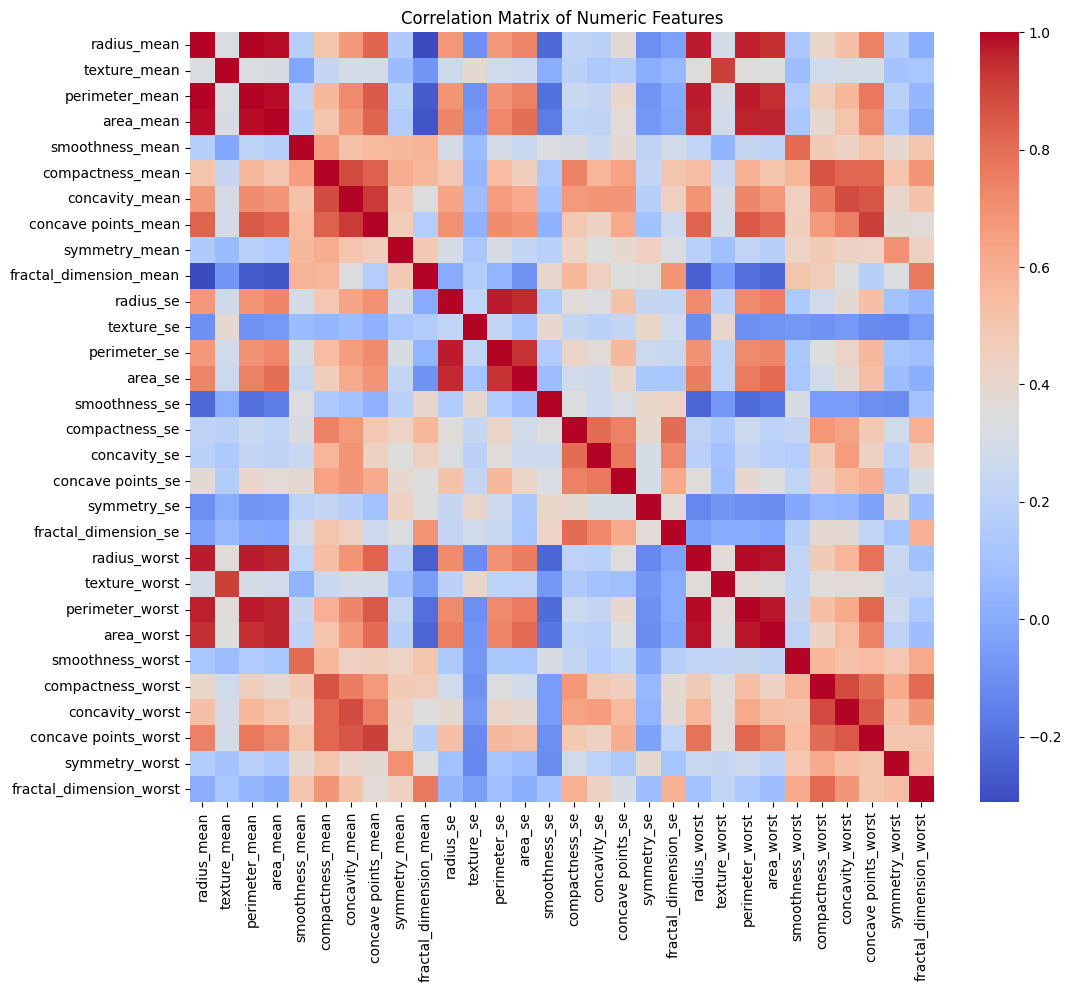

In [90]:
# 3. Correlation matrix
plt.figure(figsize=(12,10))
numeric_cols=df.select_dtypes(include=[np.number]).columns
corr_matrix=df[numeric_cols].corr()
sns.heatmap(corr_matrix,annot=False,cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

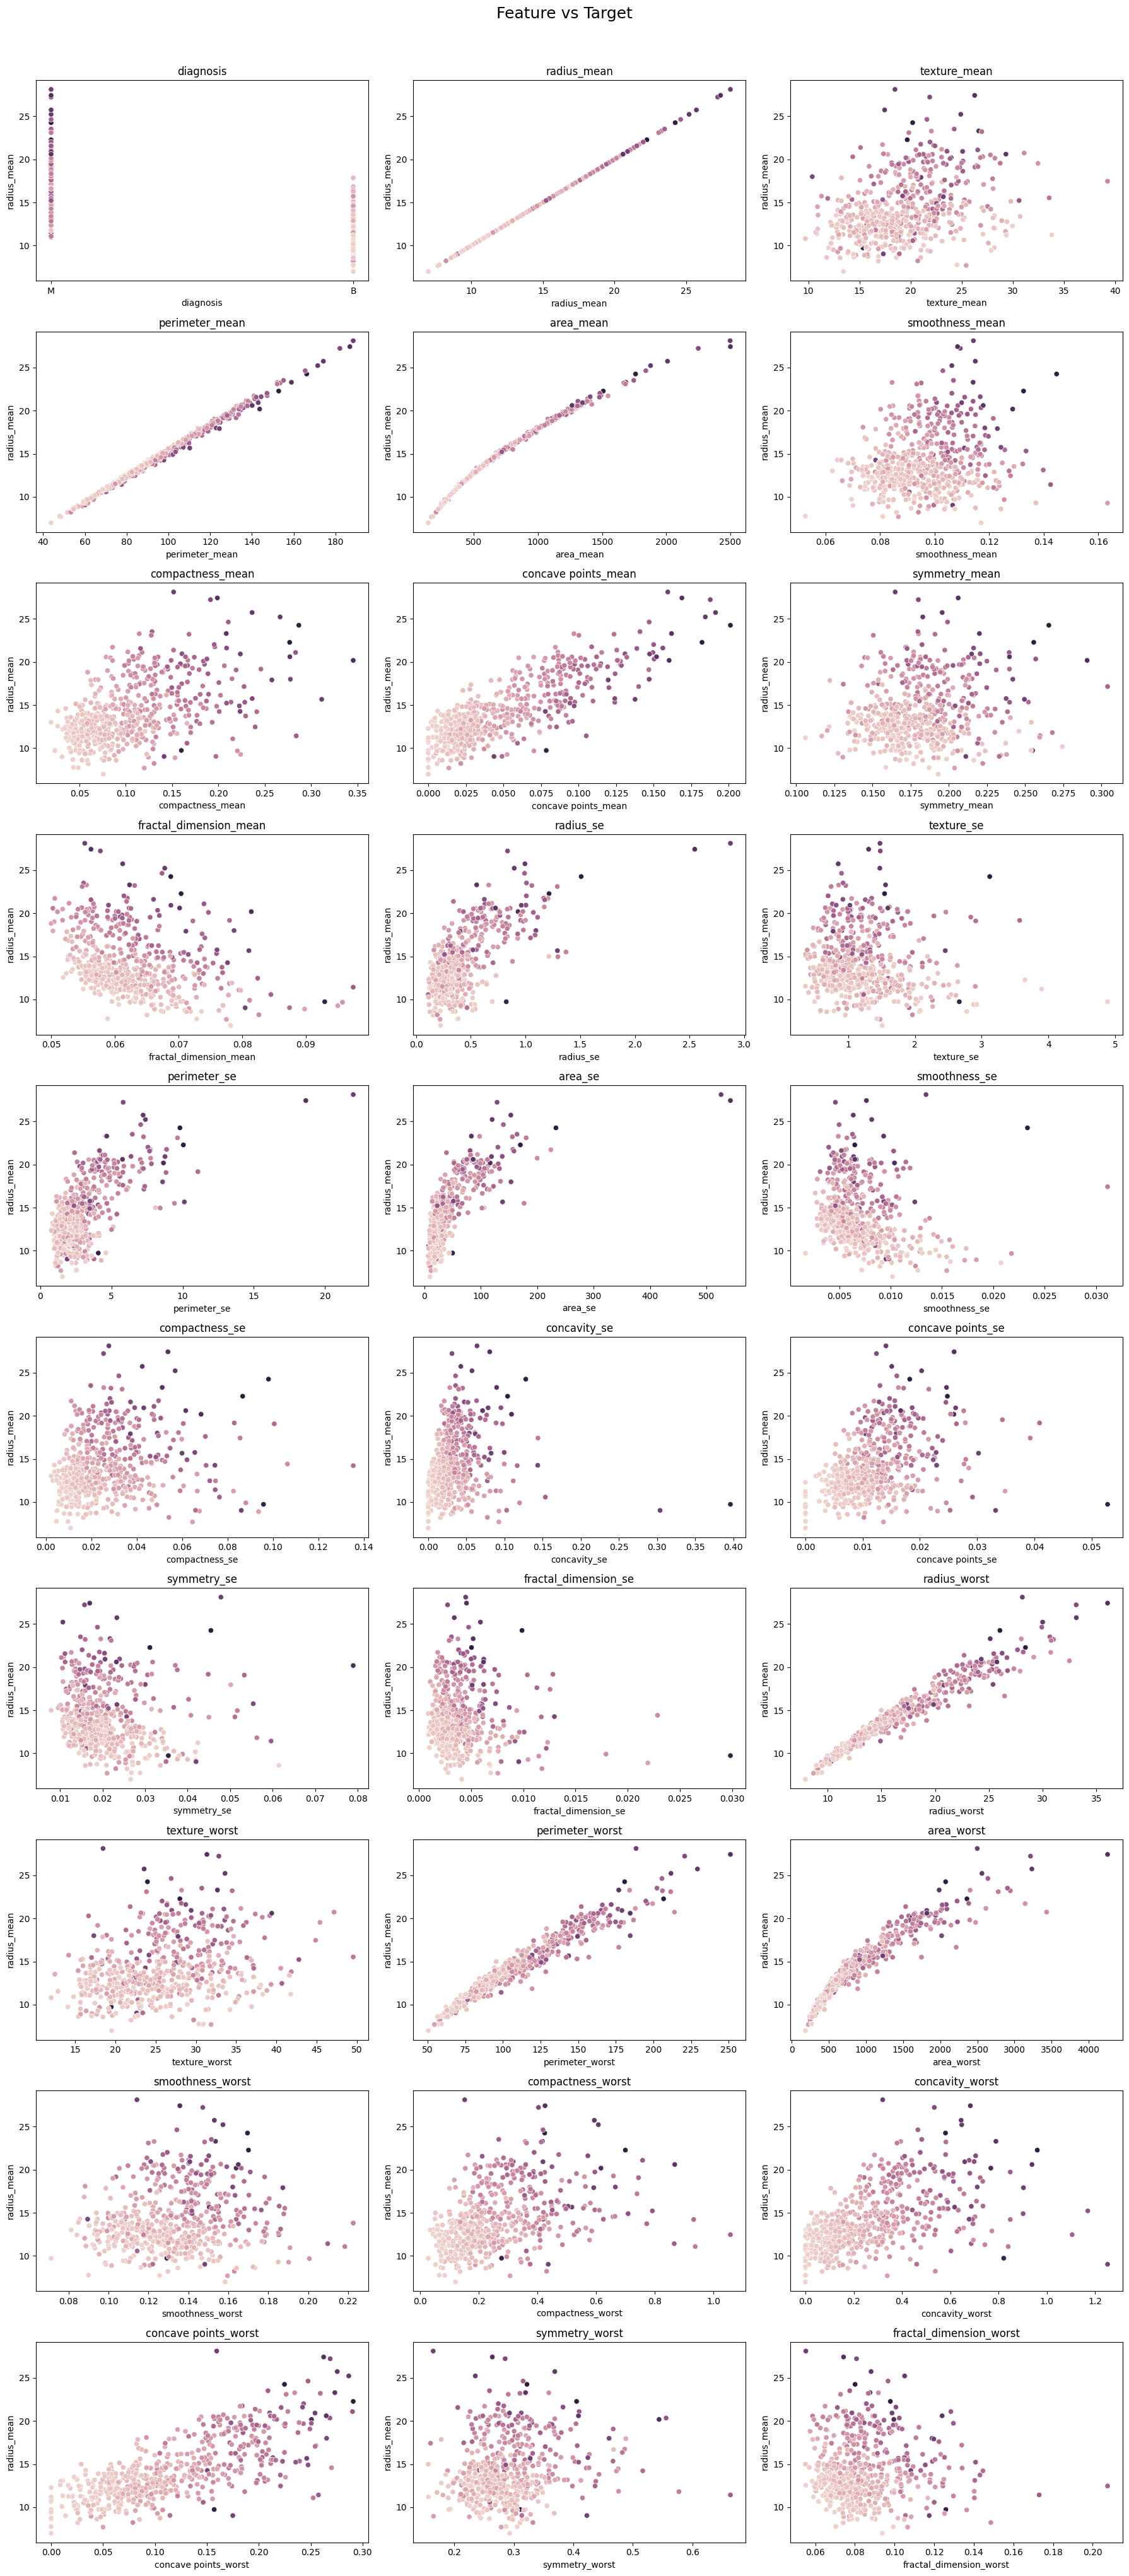

In [108]:

#4. Visualize Relationships with Target
all_columns=df.columns
target_col='concavity_mean'

feature_cols=[col for col in all_columns if col not in target_col]

cols_per_row=3
total=len(feature_cols)
rows=(total+cols_per_row-1) // cols_per_row

plt.figure(figsize=(18,rows*4))
for i ,col in enumerate(feature_cols):
    plt.subplot(rows,cols_per_row,i+1)
    sns.scatterplot(x=col,y='radius_mean',hue=target_col,data=df,legend=False)
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Feature vs Target", fontsize=18, y=1.02)
plt.show()



# 📊 StandardScaler — Mathematical Explanation

## 🎯 What Does StandardScaler Do?

`StandardScaler` standardizes features by **removing the mean** and **scaling to unit variance**.

### 👉 Formula:

$$
z = \frac{x - \mu}{\sigma}
$$

Where:

- $x$ = original feature value
- $\mu$ = mean of the feature (column)
- $\sigma$ = standard deviation of the feature (column)
- $z$ = standardized (scaled) value

---

## 🧠 Why Standardize?

- Many ML algorithms (like **KNN**, **SVM**, **Logistic Regression**, etc.) are **sensitive to feature scale**.
- Features with larger ranges can dominate others.
- StandardScaler ensures each feature has:
  - Mean = **0**
  - Standard Deviation = **1**

---


In [128]:
# feature engineering
# data=df.isnull().sum()
# There is no null data

# Feature Scaling (Standardization)
from sklearn.preprocessing import LabelEncoder
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col]=le.fit_transform(df[col])

X=df.drop('radius_mean',axis=1)
scaler=StandardScaler()
scaled_features=scaler.fit_transform(X)
scaled_df=pd.DataFrame(scaled_features,columns=X.columns)
scaled_df.head()

,diagnosis,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.297676,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.297676,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.297676,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1.297676,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.297676,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


# 🔢 Polynomial Features — Feature Engineering

## 🎯 What Are Polynomial Features?

Polynomial features expand your input features by adding **higher-degree terms** and **interaction terms**.

This helps **linear models** (like Linear Regression) capture **non-linear patterns** in the data.

---

## 🧠 Why Use Polynomial Features?

Some relationships between features and the target variable are **non-linear**.

By generating polynomial features, we allow a linear model to fit a **non-linear curve**.

---

## 🧮 Example: Degree = 2

Suppose you have one feature:

$$
X = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} = \begin{bmatrix} 2 \\ 3 \\ 4 \end{bmatrix}
$$

Then, with **degree = 2**, polynomial features will generate:

$$
X_{\text{poly}} = \begin{bmatrix} 1 & x & x^2 \end{bmatrix}
$$

So:

| Original $x$ | Transformed Features |
|--------------|----------------------|
| 2            | [1, 2, 4]            |
| 3            | [1, 3, 9]            |
| 4            | [1, 4, 16]           |

---

## 📚 General Formula (Multivariate)

For input features:
$$
X = [x_1, x_2]
$$

With **degree = 2**, we generate:

$$
[1,\ x_1,\ x_2,\ x_1^2,\ x_1 x_2,\ x_2^2]
$$

---

## 🧰 In Python (Sklearn)

```python
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=True)
X_poly = poly.fit_transform(X)


In [144]:
# Polynomial features

from sklearn.preprocessing import PolynomialFeatures
top_features=corr_matrix['radius_mean'].abs().sort_values(ascending=False).index[1:6]
poly=PolynomialFeatures(degree=2,include_bias=False)
poly_features=poly.fit_transform(df[top_features])
poly_features_name=poly.get_feature_names_out(top_features)
poly_df = pd.DataFrame(poly_features, columns=poly_features_name)
poly_df.head()



,perimeter_mean,area_mean,radius_worst,perimeter_worst,area_worst,perimeter_mean^2,perimeter_mean area_mean,perimeter_mean radius_worst,perimeter_mean perimeter_worst,perimeter_mean area_worst,area_mean^2,area_mean radius_worst,area_mean perimeter_worst,area_mean area_worst,radius_worst^2,radius_worst perimeter_worst,radius_worst area_worst,perimeter_worst^2,perimeter_worst area_worst,area_worst^2
0,122.80,1001.0,25.38,184.60,2019.0,15079.8400,122922.800,3116.6640,22668.8800,247933.200,1002001.00,25405.380,184784.600,2021019.00,644.1444,4685.1480,51242.220,34077.1600,372707.400,4076361.00
1,132.90,1326.0,24.99,158.80,1956.0,17662.4100,176225.400,3321.1710,21104.5200,259952.400,1758276.00,33136.740,210568.800,2593656.00,624.5001,3968.4120,48880.440,25217.4400,310612.800,3825936.00
2,130.00,1203.0,23.57,152.50,1709.0,16900.0000,156390.000,3064.1000,19825.0000,222170.000,1447209.00,28354.710,183457.500,2055927.00,555.5449,3594.4250,40281.130,23256.2500,260622.500,2920681.00
3,77.58,386.1,14.91,98.87,567.7,6018.6564,29953.638,1156.7178,7670.3346,44042.166,149073.21,5756.751,38173.707,219188.97,222.3081,1474.1517,8464.407,9775.2769,56128.499,322283.29
4,135.10,1297.0,22.54,152.20,1575.0,18252.0100,175224.700,3045.1540,20562.2200,212782.500,1682209.00,29234.380,197403.400,2042775.00,508.0516,3430.5880,35500.500,23164.8400,239715.000,2480625.00


In [147]:
# Combine scaled and polynomial features
X=pd.concat([scaled_df,poly_df],axis=1)
y=df['radius_mean']

In [150]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr_model=LinearRegression()
lr_model.fit(x_train, y_train)
# make predictions
y_pred=lr_model.predict(x_test)
y_pred

array([12.51572683, 18.96226873, 15.47301673, 12.39109399, 11.53642592,
       20.50725983, 21.95209751, 17.54806586, 13.37965187, 13.86762342,
       13.1893753 , 16.81410082, 14.9588259 , 16.40906613, 12.37338032,
       19.17717913, 14.79100814, 10.15976441,  7.00475517, 20.71139737,
       13.84682451, 12.09277824, 21.5605481 , 10.03379282, 11.64165673,
       13.57341702, 13.24607247, 10.25249915, 12.76227812, 17.22461199,
       11.15299575, 12.07210078,  9.73026336, 13.68017158, 10.19216986,
       11.52959147, 15.94236262, 11.72405666, 18.25750028, 14.66838256,
       10.54474944, 15.05977736, 11.63009034, 11.80467993, 11.88865613,
       11.314936  ,  9.34663295,  9.39662864, 11.66011272, 12.94278111,
       17.20769829, 18.57336966, 13.20591199, 13.91375816, 12.00177905,
       13.15539536, 10.30729713, 25.0098373 , 13.47512859, 11.30399427,
       12.87956922, 19.71419732, 21.62362357, 14.40205279, 12.2860202 ,
       12.66824447, 15.85329762, 20.42949653, 11.84315905, 12.94

In [158]:
# Evaluate the model
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"Model Performance:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Model Performance:
Mean Squared Error: 0.0032
R² Score: 0.9997


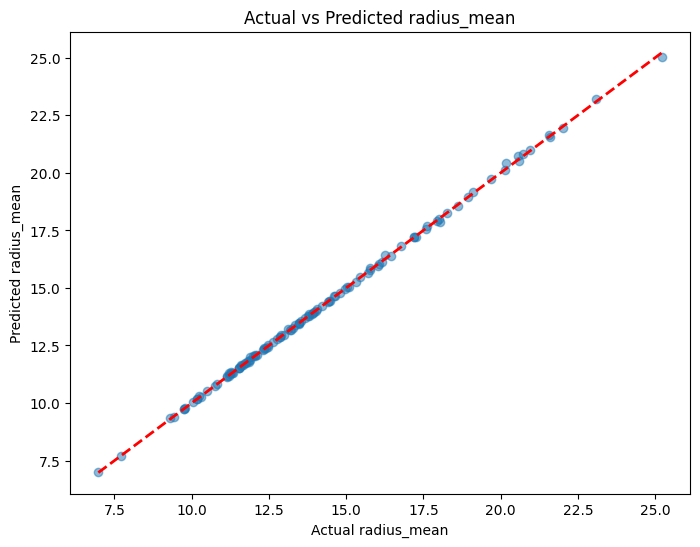

In [159]:
# Visualizing predicted vs actual
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--',lw=2)
plt.xlabel('Actual radius_mean')
plt.ylabel('Predicted radius_mean')
plt.title('Actual vs Predicted radius_mean')
plt.show()

In [160]:
#   Feature Importance (based on coefficients)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)
print("\nTop 5 Feature Importances:")
print(feature_importance.head())


Top 5 Feature Importances:
             Feature  Coefficient
32      radius_worst     0.187675
30    perimeter_mean     0.127791
5   compactness_mean    -0.109415
6     concavity_mean    -0.081432
16      concavity_se     0.043270
